# Практическая работа №3: Кластерный анализ.
Выполнил студент группы 0373 Курилов Артём. Вариант 11.

## Цель работы
Освоение основных понятий и некоторых методов кластерного анализа,
в частности, метода k-means и метода поиска сгущений.

## Основные теоретические положения

## Постановка задачи
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств
(кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Используемые бибилиотеки:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from prettytable import PrettyTable
import random

### Выборка

In [3]:
samplex1 = [63.05, 60.99, 56.54, 57.9, 53.57, 57.45, 57.53, 58.77, 56.34, 59.73, 60.95, 61.03, 64.02,
           64.72, 62.71, 64.67, 64.81, 67.99, 67.60, 68.7, 68.88, 70.83, 69.27, 68.72, 69.6, 70.77,
           72.05, 72.04, 71.9, 72.33, 72.25, 73.4, 72.72, 71.24, 73, 72.4, 73.8, 72.14, 69.78,
           72.15, 75.33, 75.29, 77.19, 76.15, 75.93, 78.51, 78.5, 75.88, 76.32, 76.89, 74.52, 74.12,
           75.84, 75.5, 76.86, 76.28, 78.68, 79.89, 80.58, 82.75, 82.4, 86.66, 82.26, 78.45, 78.76,
           77.98, 75.41, 72.42, 73.83, 74.952, 74.41, 73.45, 75.83, 79.5, 78.76, 79.41, 80.94, 82.12,
           80.34, 79.69, 83.04, 88.57, 88.62, 88.15, 88.41, 89.95, 88.67, 88.7, 88.58, 90.2, 91.24, 
           92.36, 91.62, 91.71, 89.22, 88.57, 88.59, 87.04]
sampley1 = [59.804, 55.857, 52.8, 53.005, 50.677, 54.3, 55.295, 56.907, 54.82, 56.547, 59.408, 59.38,
           62.02, 63.562, 60.486, 63.284, 63.45, 66.267, 65.55, 66.873, 67.764, 68.858, 66.42, 66.95, 
           68.674, 69.673, 70.606, 69.8, 70.9, 71.489, 70.3, 72.161, 70.1, 69.396, 71.569, 71.068, 72.262,
           71, 67.351, 70.491, 73.643, 74.282, 74.827, 74.175, 74.315, 75.18, 77.305, 74.42, 74.883, 74.611,
           73.283, 73.173, 74.082, 73.9, 75.4, 75.398, 77.198, 78.4, 79.104, 81.287, 81.516, 83.316, 77.381,
           76.803, 74.868, 76.592, 73.5, 70.327, 72.94, 73.961, 73.214, 71.8, 74.473, 78.16, 77.25, 76.4,
           78.581, 81.026, 79.139, 76.112, 80.801, 85.301, 87.018, 85.865, 87.28, 88.385, 87.307, 87.093, 86.384,
           88.622, 88.468, 91.133, 90.289, 88.391, 88, 87.497, 86.933, 84.95]

In [4]:
samplex1 = np.sort(samplex1)
sampley1 = np.sort(sampley1)

### Пункт 1

In [5]:
n = 98
Dx = 0
Dy = 0
samplex = [0] * 98
sampley = [0] * 98
MOx = (sum(samplex1)/n)
MOy = (sum(sampley1)/n)
for i in range(98):
    Dx = Dx + (samplex1[i] - MOx)**2
Dx = Dx/n
skox = math.sqrt(Dx)
for i in range(98):
    Dy = Dy + (sampley1[i] - MOy)**2
Dy = Dy/n
skoy = math.sqrt(Dy)
for i in range(98): 
    samplex[i] = round((samplex1[i] - MOx)/skox, 3) # нормализовали множество через формулу (x-xср)/ско, называется z-нормализация(z-масштабирование) или нормализация средним
for i in range(98): 
    sampley[i] = round((sampley1[i] - MOy)/skoy, 3) 
print(samplex)
print(sampley)

[-2.31, -2.015, -1.993, -1.896, -1.888, -1.848, -1.755, -1.653, -1.522, -1.518, -1.514, -1.334, -1.298, -1.194, -1.125, -1.12, -1.11, -0.812, -0.771, -0.695, -0.693, -0.676, -0.634, -0.599, -0.579, -0.474, -0.467, -0.423, -0.353, -0.338, -0.337, -0.327, -0.326, -0.316, -0.307, -0.3, -0.297, -0.265, -0.236, -0.193, -0.187, -0.15, -0.147, -0.116, -0.085, -0.073, -0.027, 0.009, 0.013, 0.022, 0.031, 0.067, 0.068, 0.072, 0.077, 0.101, 0.115, 0.119, 0.177, 0.18, 0.212, 0.296, 0.346, 0.352, 0.353, 0.371, 0.38, 0.38, 0.449, 0.459, 0.479, 0.5, 0.548, 0.574, 0.612, 0.738, 0.753, 0.768, 0.806, 0.837, 1.223, 1.264, 1.382, 1.41, 1.427, 1.427, 1.428, 1.429, 1.432, 1.438, 1.441, 1.497, 1.574, 1.601, 1.712, 1.753, 1.762, 1.832]
[-2.365, -2.143, -2.121, -1.986, -1.931, -1.882, -1.823, -1.751, -1.713, -1.455, -1.452, -1.41, -1.339, -1.179, -1.047, -1.029, -1.018, -0.81, -0.735, -0.719, -0.672, -0.663, -0.622, -0.578, -0.483, -0.464, -0.408, -0.379, -0.366, -0.334, -0.313, -0.31, -0.293, -0.281, -0.251, 

### Пункт 2

In [6]:
kmax = math.sqrt(n/2)
print("Вверхний предел количества кластеров: ", round(kmax))

Вверхний предел количества кластеров:  7


### Пункт 3

[1.3671946014301044, 0.2668316838723901, -0.6294608876308656, -0.7840731900617501, 1.9937457408209807, -0.14908640900674763, -1.196631960871179]
[1.2514185570799752, 0.8846088688735505, -1.8815578331769047, 0.5152666851315821, 1.9910404148633485, -1.7338392397199898, -0.7128855714172659]


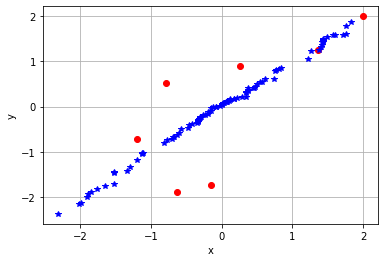

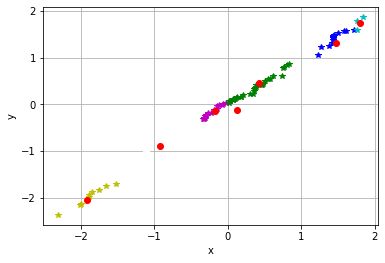

Координаты первой точки: 1.468 1.316
Координаты второй точки: 0.423 0.448
Координаты третьей точки: -1.916 -2.039
Координаты четвёртой точки: -0.182 -0.146
Координаты пятой точки: 1.792 1.734
Координаты шестой точки: 0.13 -0.13
Координаты седьмой точки: -0.928 -0.895


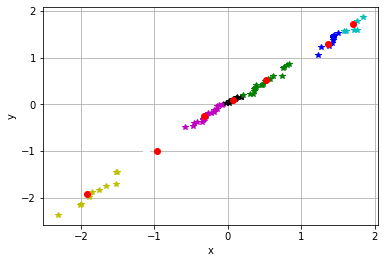

Координаты первой точки: 1.36 1.292
Координаты второй точки: 0.524 0.528
Координаты третьей точки: -1.912 -1.908
Координаты четвёртой точки: -0.326 -0.242
Координаты пятой точки: 1.703 1.721
Координаты шестой точки: 0.076 0.094
Координаты седьмой точки: -0.966 -0.994


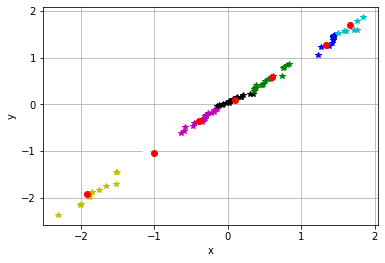

Координаты первой точки: 1.332 1.265
Координаты второй точки: 0.594 0.576
Координаты третьей точки: -1.912 -1.908
Координаты четвёртой точки: -0.392 -0.365
Координаты пятой точки: 1.664 1.701
Координаты шестой точки: 0.099 0.092
Координаты седьмой точки: -1.005 -1.036


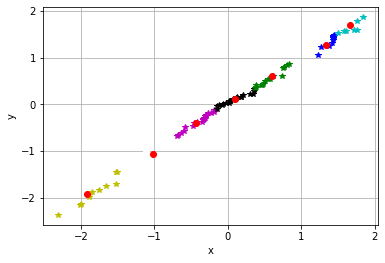

Координаты первой точки: 1.332 1.265
Координаты второй точки: 0.604 0.601
Координаты третьей точки: -1.912 -1.908
Координаты четвёртой точки: -0.44 -0.396
Координаты пятой точки: 1.664 1.701
Координаты шестой точки: 0.102 0.108
Координаты седьмой точки: -1.014 -1.064


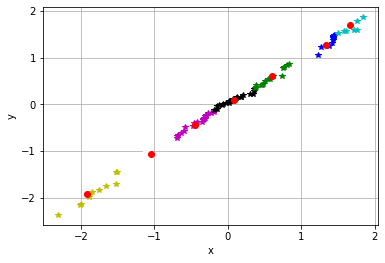

Координаты первой точки: 1.332 1.265
Координаты второй точки: 0.604 0.601
Координаты третьей точки: -1.912 -1.908
Координаты четвёртой точки: -0.444 -0.438
Координаты пятой точки: 1.664 1.701
Координаты шестой точки: 0.083 0.103
Координаты седьмой точки: -1.052 -1.072


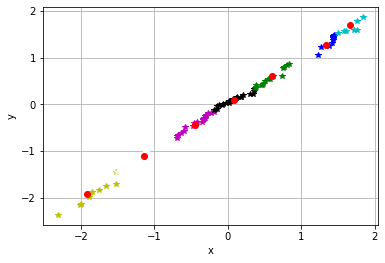

Координаты первой точки: 1.332 1.265
Координаты второй точки: 0.604 0.601
Координаты третьей точки: -1.914 -1.91
Координаты четвёртой точки: -0.444 -0.438
Координаты пятой точки: 1.664 1.701
Координаты шестой точки: 0.083 0.103
Координаты седьмой точки: -1.142 -1.094


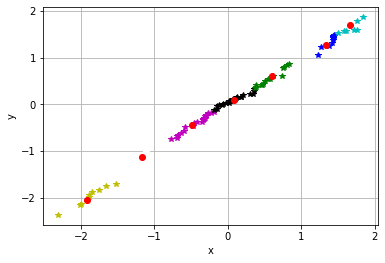

Координаты первой точки: 1.332 1.265
Координаты второй точки: 0.604 0.601
Координаты третьей точки: -1.916 -2.039
Координаты четвёртой точки: -0.482 -0.446
Координаты пятой точки: 1.664 1.701
Координаты шестой точки: 0.083 0.103
Координаты седьмой точки: -1.165 -1.132


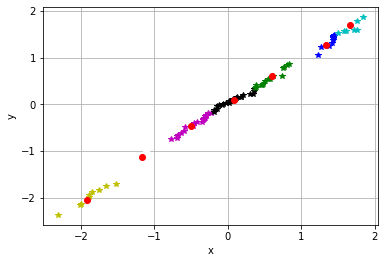

Координаты первой точки: 1.332 1.265
Координаты второй точки: 0.604 0.601
Координаты третьей точки: -1.916 -2.039
Координаты четвёртой точки: -0.504 -0.458
Координаты пятой точки: 1.664 1.701
Координаты шестой точки: 0.08 0.084
Координаты седьмой точки: -1.165 -1.132


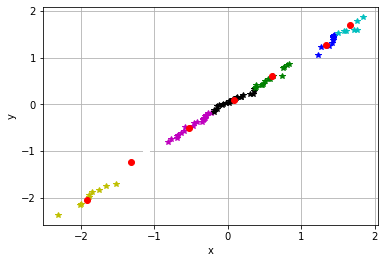

Координаты первой точки: 1.332 1.265
Координаты второй точки: 0.604 0.601
Координаты третьей точки: -1.916 -2.039
Координаты четвёртой точки: -0.524 -0.496
Координаты пятой точки: 1.664 1.701
Координаты шестой точки: 0.08 0.084
Координаты седьмой точки: -1.314 -1.236


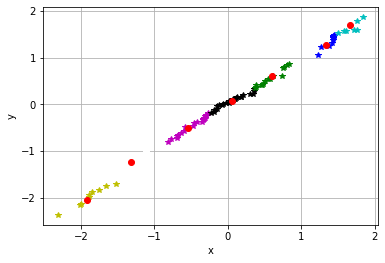

Координаты первой точки: 1.332 1.265
Координаты второй точки: 0.604 0.601
Координаты третьей точки: -1.916 -2.039
Координаты четвёртой точки: -0.538 -0.5
Координаты пятой точки: 1.664 1.701
Координаты шестой точки: 0.058 0.072
Координаты седьмой точки: -1.314 -1.236


In [7]:
randx = [0] * 7
randy = [0] * 7
dist1 = [0] * 98
dist2 = [0] * 98
dist3 = [0] * 98
dist4 = [0] * 98
dist5 = [0] * 98
dist6 = [0] * 98
dist7 = [0] * 98
score1 = 0
for i in range(7):
    randx[i] = random.uniform(-2, 2)
print(randx)
for i in range(7):
    randy[i] = random.uniform(-2, 2)
print(randy)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
for i in range(7):
    plt.plot(randx[i],randy[i],'ro')
for i in range(98):
    plt.plot(samplex[i],sampley[i],'b*')
plt.show()
while score1 < 10:
    s = [0] * 7
    xmax1 = -3
    xmax2 = -3
    xmin1 = 3
    xmin2 = 3
    ymax1 = -3
    ymax2 = -3
    ymin1 = 3
    ymin2 = 3
    xmax3 = -3
    xmin3 = 3
    ymax3 = -3
    ymin3 = 3
    xmax4 = -3
    xmin4 = 3
    ymax4 = -3
    ymin4 = 3
    xmax5 = -3
    xmin5 = 3
    ymax5 = -3
    ymin5 = 3
    xmax6 = -3
    xmin6 = 3
    ymax6 = -3
    ymin6 = 3
    xmax7 = -3
    xmin7 = 3
    ymax7 = -3
    ymin7 = 3
    for i in range(98):
        dist1[i] = math.sqrt((samplex[i]-randx[0])**2+(sampley[i]-randy[0])**2)
        dist2[i] = math.sqrt((samplex[i]-randx[1])**2+(sampley[i]-randy[1])**2)
        dist3[i] = math.sqrt((samplex[i]-randx[2])**2+(sampley[i]-randy[2])**2)
        dist4[i] = math.sqrt((samplex[i]-randx[3])**2+(sampley[i]-randy[3])**2)
        dist5[i] = math.sqrt((samplex[i]-randx[4])**2+(sampley[i]-randy[4])**2)
        dist6[i] = math.sqrt((samplex[i]-randx[5])**2+(sampley[i]-randy[5])**2)
        dist7[i] = math.sqrt((samplex[i]-randx[6])**2+(sampley[i]-randy[6])**2)
        if dist1[i] < dist2[i] and dist1[i] < dist3[i] and dist1[i] < dist4[i] and dist1[i] < dist5[i] and dist1[i] < dist6[i] and dist1[i] < dist7[i]:
            plt.plot(samplex[i],sampley[i],'b*')
            if samplex[i] < xmin1:
                xmin1 = samplex[i]
            if samplex[i] > xmax1:
                xmax1 = samplex[i]
            if sampley[i] < ymin1:
                ymin1 = sampley[i]
            if sampley[i] > ymax1:
                ymax1 = sampley[i]
            s[0] += 1
        if dist2[i] < dist1[i] and dist2[i] < dist3[i] and dist2[i] < dist4[i] and dist2[i] < dist5[i] and dist2[i] < dist6[i] and dist2[i] < dist7[i]:
            plt.plot(samplex[i],sampley[i],'g*')
            if samplex[i] < xmin2:
                xmin2 = samplex[i]
            if samplex[i] > xmax2:
                xmax2 = samplex[i]
            if sampley[i] < ymin2:
                ymin2 = sampley[i]
            if sampley[i] > ymax2:
                ymax2 = sampley[i]
            s[1] += 1
        if dist3[i] < dist1[i] and dist3[i] < dist2[i] and dist3[i] < dist4[i] and dist3[i] < dist5[i] and dist3[i] < dist6[i] and dist3[i] < dist7[i]:
            plt.plot(samplex[i],sampley[i],'y*')
            if samplex[i] < xmin3:
                xmin3 = samplex[i]
            if samplex[i] > xmax3:
                xmax3 = samplex[i]
            if sampley[i] < ymin3:
                ymin3 = sampley[i]
            if sampley[i] > ymax3:
                ymax3 = sampley[i]
            s[2] += 1
        if dist4[i] < dist1[i] and dist4[i] < dist2[i] and dist4[i] < dist3[i] and dist4[i] < dist5[i] and dist4[i] < dist6[i] and dist4[i] < dist7[i]:
            plt.plot(samplex[i],sampley[i],'m*')
            if samplex[i] < xmin4:
                xmin4 = samplex[i]
            if samplex[i] > xmax4:
                xmax4 = samplex[i]
            if sampley[i] < ymin4:
                ymin4 = sampley[i]
            if sampley[i] > ymax4:
                ymax4 = sampley[i]
            s[3] += 1
        if dist5[i] < dist1[i] and dist5[i] < dist2[i] and dist5[i] < dist3[i] and dist5[i] < dist4[i] and dist5[i] < dist6[i] and dist5[i] < dist7[i]:
            plt.plot(samplex[i],sampley[i],'c*')
            if samplex[i] < xmin5:
                xmin5 = samplex[i]
            if samplex[i] > xmax5:
                xmax5 = samplex[i]
            if sampley[i] < ymin5:
                ymin5 = sampley[i]
            if sampley[i] > ymax5:
                ymax5 = sampley[i]
            s[4] += 1
        if dist6[i] < dist1[i] and dist6[i] < dist2[i] and dist6[i] < dist3[i] and dist6[i] < dist4[i] and dist6[i] < dist5[i] and dist6[i] < dist7[i]:
            plt.plot(samplex[i],sampley[i],'k*')
            if samplex[i] < xmin6:
                xmin6 = samplex[i]
            if samplex[i] > xmax6:
                xmax6 = samplex[i]
            if sampley[i] < ymin6:
                ymin6 = sampley[i]
            if sampley[i] > ymax6:
                ymax6 = sampley[i]
            s[5] += 1
        if dist7[i] < dist1[i] and dist7[i] < dist2[i] and dist7[i] < dist3[i] and dist7[i] < dist4[i] and dist7[i] < dist5[i] and dist7[i] < dist6[i]:
            plt.plot(samplex[i],sampley[i], "w*")
            if samplex[i] < xmin7:
                xmin7 = samplex[i]
            if samplex[i] > xmax7:
                xmax7 = samplex[i]
            if sampley[i] < ymin7:
                ymin7 = sampley[i]
            if sampley[i] > ymax7:
                ymax7 = sampley[i]
            s[6] += 1   
    newx1 = (xmin1 + xmax1)/2
    newy1 = (ymin1 + ymax1)/2
    newx2 = (xmin2 + xmax2)/2
    newy2 = (ymin2 + ymax2)/2
    newx3 = (xmin3 + xmax3)/2
    newy3 = (ymin3 + ymax3)/2
    newx4 = (xmin4 + xmax4)/2
    newy4 = (ymin4 + ymax4)/2
    newx5 = (xmin5 + xmax5)/2
    newy5 = (ymin5 + ymax5)/2
    newx6 = (xmin6 + xmax6)/2
    newy6 = (ymin6 + ymax6)/2
    newx7 = (xmin7 + xmax7)/2
    newy7 = (ymin7 + ymax7)/2
    randx[0] = round(newx1, 3)
    randy[0] = round(newy1, 3)
    randx[1] = round(newx2, 3)
    randy[1] = round(newy2, 3)
    randx[2] = round(newx3, 3)
    randy[2] = round(newy3, 3)
    randx[3] = round(newx4, 3)
    randy[3] = round(newy4, 3)
    randx[4] = round(newx5, 3)
    randy[4] = round(newy5, 3)
    randx[5] = round(newx6, 3)
    randy[5] = round(newy6, 3)
    randx[6] = round(newx7, 3)
    randy[6] = round(newy7, 3)
    for i in range(6):
        i += 1
        if randx[0] == randx[i] and randy[0] == randx[i]:
            randx[0] += 0.25
            randy[0] -= 0.25
    for i in range(6):
        if randx[1] == randx[i] and randy[1] == randx[i]:
            randx[1] += 0.10
            randy[1] += 0.10
            if i == 0:
                i += 2
            else:
                i += 1
    for i in range(6):
        if randx[2] == randx[i] and randy[2] == randx[i]:
            randx[2] += 0.15
            randy[2] -= 0.15
            if i == 1:
                i += 2
            else:
                i += 1
    for i in range(6):
        if randx[3] == randx[i] and randy[3] == randx[i]:
            randx[3] += 0.05
            randy[3] -= 0.05
            if i == 2:
                i += 2
            else:
                i += 1
    for i in range(6):
        if randx[4] == randx[i] and randy[4] == randx[i]:
            randx[4] += 0.08
            randy[4] -= 0.08
            if i == 3:
                i += 2
            else:
                i += 1
    for i in range(6):
        if randx[5] == randx[i] and randy[5] == randx[i]:
            randx[5] += 0.13
            randy[5] -= 0.13
            if i == 4:
                i += 2
            else:
                i += 1
    for i in range(6):
        if randx[6] == randx[i] and randy[6] == randx[i]:
            randx[6] += 0.27
            randy[6] -= 0.27
            if i == 5:
                i += 2
            else:
                i += 1
    for i in range(7):
        plt.plot(randx[i],randy[i],'ro')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()
    print("Координаты первой точки:", randx[0], randy[0])
    print("Координаты второй точки:", randx[1], randy[1])
    print("Координаты третьей точки:", randx[2], randy[2])
    print("Координаты четвёртой точки:", randx[3], randy[3])
    print("Координаты пятой точки:", randx[4], randy[4])
    print("Координаты шестой точки:", randx[5], randy[5])
    print("Координаты седьмой точки:", randx[6], randy[6])
    score1 += 1

### Пункт 4

[-0.5470303857435876, -0.3333259945648144, 0.45160813680032863, -0.7783803195020869, -0.7280761143807348, -1.1085560523343183, -1.6378894229143781]
[1.5350467072279828, 0.9211763538934883, -1.6119940695539898, -1.6911265776796465, -0.05128005662222801, -1.6739522465357313, -0.06958539095296734]


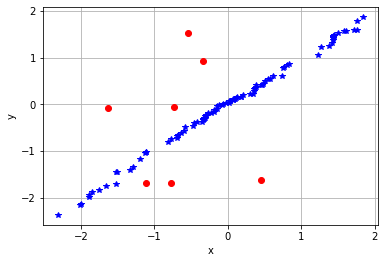

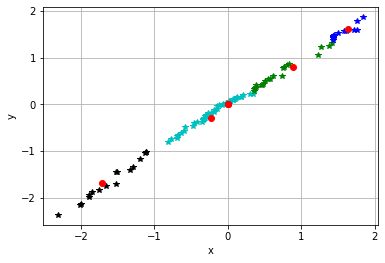

Координаты первой точки: 1.63 1.616
Координаты второй точки: 0.881 0.804
Координаты третьей точки: 0.0 0.0
Координаты четвёртой точки: 0.0 0.0
Координаты пятой точки: -0.233 -0.295
Координаты шестой точки: -1.71 -1.692
Координаты седьмой точки: 0.0 0.0


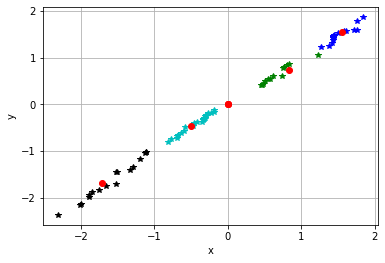

Координаты первой точки: 1.548 1.542
Координаты второй точки: 0.836 0.73
Координаты третьей точки: 0.0 0.0
Координаты четвёртой точки: 0.0 0.0
Координаты пятой точки: -0.5 -0.464
Координаты шестой точки: -1.71 -1.692
Координаты седьмой точки: 0.0 0.0


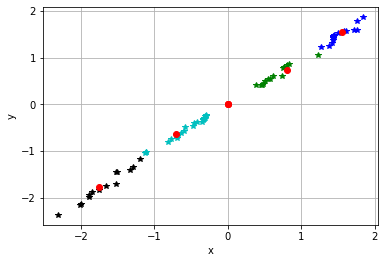

Координаты первой точки: 1.548 1.542
Координаты второй точки: 0.802 0.727
Координаты третьей точки: 0.0 0.0
Координаты четвёртой точки: 0.0 0.0
Координаты пятой точки: -0.711 -0.64
Координаты шестой точки: -1.752 -1.772
Координаты седьмой точки: 0.0 0.0


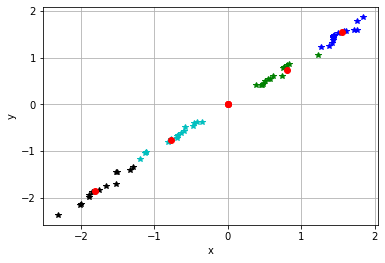

Координаты первой точки: 1.548 1.542
Координаты второй точки: 0.802 0.727
Координаты третьей точки: 0.0 0.0
Координаты четвёртой точки: 0.0 0.0
Координаты пятой точки: -0.774 -0.772
Координаты шестой точки: -1.804 -1.852
Координаты седьмой точки: 0.0 0.0


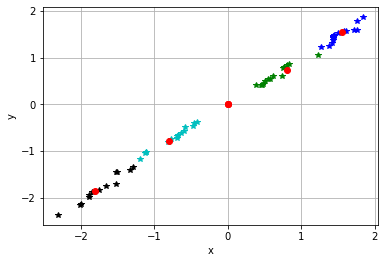

Координаты первой точки: 1.548 1.542
Координаты второй точки: 0.802 0.727
Координаты третьей точки: 0.0 0.0
Координаты четвёртой точки: 0.0 0.0
Координаты пятой точки: -0.808 -0.779
Координаты шестой точки: -1.804 -1.852
Координаты седьмой точки: 0.0 0.0


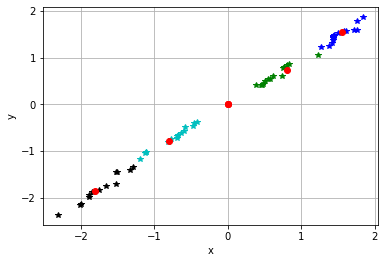

Координаты первой точки: 1.548 1.542
Координаты второй точки: 0.802 0.727
Координаты третьей точки: 0.0 0.0
Координаты четвёртой точки: 0.0 0.0
Координаты пятой точки: -0.808 -0.779
Координаты шестой точки: -1.804 -1.852
Координаты седьмой точки: 0.0 0.0


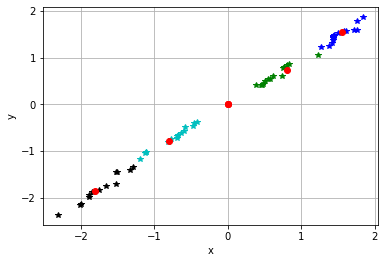

Координаты первой точки: 1.548 1.542
Координаты второй точки: 0.802 0.727
Координаты третьей точки: 0.0 0.0
Координаты четвёртой точки: 0.0 0.0
Координаты пятой точки: -0.808 -0.779
Координаты шестой точки: -1.804 -1.852
Координаты седьмой точки: 0.0 0.0


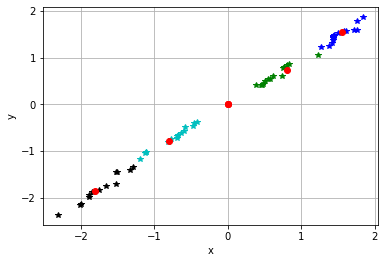

Координаты первой точки: 1.548 1.542
Координаты второй точки: 0.802 0.727
Координаты третьей точки: 0.0 0.0
Координаты четвёртой точки: 0.0 0.0
Координаты пятой точки: -0.808 -0.779
Координаты шестой точки: -1.804 -1.852
Координаты седьмой точки: 0.0 0.0


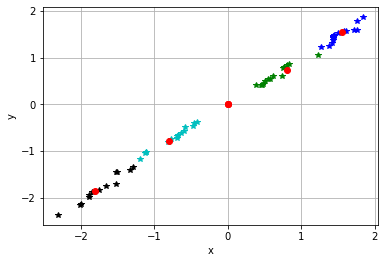

Координаты первой точки: 1.548 1.542
Координаты второй точки: 0.802 0.727
Координаты третьей точки: 0.0 0.0
Координаты четвёртой точки: 0.0 0.0
Координаты пятой точки: -0.808 -0.779
Координаты шестой точки: -1.804 -1.852
Координаты седьмой точки: 0.0 0.0


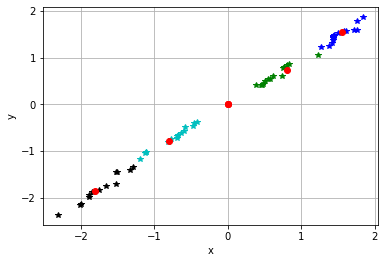

Координаты первой точки: 1.548 1.542
Координаты второй точки: 0.802 0.727
Координаты третьей точки: 0.0 0.0
Координаты четвёртой точки: 0.0 0.0
Координаты пятой точки: -0.808 -0.779
Координаты шестой точки: -1.804 -1.852
Координаты седьмой точки: 0.0 0.0


In [8]:
randx2 = [0] * 7
randy2 = [0] * 7
dist1 = [0] * 98
dist2 = [0] * 98
dist3 = [0] * 98
dist4 = [0] * 98
dist5 = [0] * 98
dist6 = [0] * 98
dist7 = [0] * 98
score1 = 0
for i in range(7):
    randx2[i] = random.uniform(-2, 2)
print(randx2)
for i in range(7):
    randy2[i] = random.uniform(-2, 2)
print(randy2)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
for i in range(7):
    plt.plot(randx2[i],randy2[i],'ro')
for i in range(98):
    plt.plot(samplex[i],sampley[i],'b*')
plt.show()
while score1 < 10:
    s2 = [0] * 7 
    xmax1 = -3
    xmax2 = -3
    xmin1 = 3
    xmin2 = 3
    ymax1 = -3
    ymax2 = -3
    ymin1 = 3
    ymin2 = 3
    xmax3 = -3
    xmin3 = 3
    ymax3 = -3
    ymin3 = 3
    xmax4 = -3
    xmin4 = 3
    ymax4 = -3
    ymin4 = 3
    xmax5 = -3
    xmin5 = 3
    ymax5 = -3
    ymin5 = 3
    xmax6 = -3
    xmin6 = 3
    ymax6 = -3
    ymin6 = 3
    xmax7 = -3
    xmin7 = 3
    ymax7 = -3
    ymin7 = 3
    for i in range(n):
        dist1[i] = abs(samplex[i] - randx2[0]) +  abs(sampley[i] - randy2[0])
        dist2[i] = abs(samplex[i] - randx2[1]) +  abs(sampley[i] - randy2[1])
        dist3[i] = abs(samplex[i] - randx2[2]) +  abs(sampley[i] - randy2[2])
        dist4[i] = abs(samplex[i] - randx2[3]) +  abs(sampley[i] - randy2[3])
        dist5[i] = abs(samplex[i] - randx2[4]) +  abs(sampley[i] - randy2[4])
        dist6[i] = abs(samplex[i] - randx2[5]) +  abs(sampley[i] - randy2[5])
        dist7[i] = abs(samplex[i] - randx2[6]) +  abs(sampley[i] - randy2[6])
        if dist1[i] < dist2[i] and dist1[i] < dist3[i] and dist1[i] < dist4[i] and dist1[i] < dist5[i] and dist1[i] < dist6[i] and dist1[i] < dist7[i]:
            plt.plot(samplex[i],sampley[i],'b*')
            if samplex[i] < xmin1:
                xmin1 = samplex[i]
            if samplex[i] > xmax1:
                xmax1 = samplex[i]
            if sampley[i] < ymin1:
                ymin1 = sampley[i]
            if sampley[i] > ymax1:
                ymax1 = sampley[i]
            s2[0] += 1
        if dist2[i] < dist1[i] and dist2[i] < dist3[i] and dist2[i] < dist4[i] and dist2[i] < dist5[i] and dist2[i] < dist6[i] and dist2[i] < dist7[i]:
            plt.plot(samplex[i],sampley[i],'g*')
            if samplex[i] < xmin2:
                xmin2 = samplex[i]
            if samplex[i] > xmax2:
                xmax2 = samplex[i]
            if sampley[i] < ymin2:
                ymin2 = sampley[i]
            if sampley[i] > ymax2:
                ymax2 = sampley[i]
            s2[1] += 1
        if dist3[i] < dist1[i] and dist3[i] < dist2[i] and dist3[i] < dist4[i] and dist3[i] < dist5[i] and dist3[i] < dist6[i] and dist3[i] < dist7[i]:
            plt.plot(samplex[i],sampley[i],'y*')
            if samplex[i] < xmin3:
                xmin3 = samplex[i]
            if samplex[i] > xmax3:
                xmax3 = samplex[i]
            if sampley[i] < ymin3:
                ymin3 = sampley[i]
            if sampley[i] > ymax3:
                ymax3 = sampley[i]
            s2[2] += 1
        if dist4[i] < dist1[i] and dist4[i] < dist2[i] and dist4[i] < dist3[i] and dist4[i] < dist5[i] and dist4[i] < dist6[i] and dist4[i] < dist7[i]:
            plt.plot(samplex[i],sampley[i],'m*')
            if samplex[i] < xmin4:
                xmin4 = samplex[i]
            if samplex[i] > xmax4:
                xmax4 = samplex[i]
            if sampley[i] < ymin4:
                ymin4 = sampley[i]
            if sampley[i] > ymax4:
                ymax4 = sampley[i]
            s2[3] += 1
        if dist5[i] < dist1[i] and dist5[i] < dist2[i] and dist5[i] < dist3[i] and dist5[i] < dist4[i] and dist5[i] < dist6[i] and dist5[i] < dist7[i]:
            plt.plot(samplex[i],sampley[i],'c*')
            if samplex[i] < xmin5:
                xmin5 = samplex[i]
            if samplex[i] > xmax5:
                xmax5 = samplex[i]
            if sampley[i] < ymin5:
                ymin5 = sampley[i]
            if sampley[i] > ymax5:
                ymax5 = sampley[i]
            s2[4] += 1
        if dist6[i] < dist1[i] and dist6[i] < dist2[i] and dist6[i] < dist3[i] and dist6[i] < dist4[i] and dist6[i] < dist5[i] and dist6[i] < dist7[i]:
            plt.plot(samplex[i],sampley[i],'k*')
            if samplex[i] < xmin6:
                xmin6 = samplex[i]
            if samplex[i] > xmax6:
                xmax6 = samplex[i]
            if sampley[i] < ymin6:
                ymin6 = sampley[i]
            if sampley[i] > ymax6:
                ymax6 = sampley[i]
            s2[5] += 1
        if dist7[i] < dist1[i] and dist7[i] < dist2[i] and dist7[i] < dist3[i] and dist7[i] < dist4[i] and dist7[i] < dist5[i] and dist7[i] < dist6[i]:
            plt.plot(samplex[i],sampley[i], "w*")
            if samplex[i] < xmin7:
                xmin7 = samplex[i]
            if samplex[i] > xmax7:
                xmax7 = samplex[i]
            if sampley[i] < ymin7:
                ymin7 = sampley[i]
            if sampley[i] > ymax7:
                ymax7 = sampley[i]
            s2[6] += 1 
    newx1 = (xmin1 + xmax1)/2
    newy1 = (ymin1 + ymax1)/2
    newx2 = (xmin2 + xmax2)/2
    newy2 = (ymin2 + ymax2)/2
    newx3 = (xmin3 + xmax3)/2
    newy3 = (ymin3 + ymax3)/2
    newx4 = (xmin4 + xmax4)/2
    newy4 = (ymin4 + ymax4)/2 
    newx5 = (xmin5 + xmax5)/2
    newy5 = (ymin5 + ymax5)/2
    newx6 = (xmin6 + xmax6)/2
    newy6 = (ymin6 + ymax6)/2
    newx7 = (xmin7 + xmax7)/2
    newy7 = (ymin7 + ymax7)/2
    randx2[0] = round(newx1, 3)
    randy2[0] = round(newy1, 3)
    randx2[1] = round(newx2, 3)
    randy2[1] = round(newy2, 3)
    randx2[2] = round(newx3, 3)
    randy2[2] = round(newy3, 3)
    randx2[3] = round(newx4, 3)
    randy2[3] = round(newy4, 3)
    randx2[4] = round(newx5, 3)
    randy2[4] = round(newy5, 3)
    randx2[5] = round(newx6, 3)
    randy2[5] = round(newy6, 3)
    randx2[6] = round(newx7, 3)
    randy2[6] = round(newy7, 3)
    for i in range(7):
        plt.plot(randx2[i],randy2[i],'ro')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()
    print("Координаты первой точки:", randx2[0], randy2[0])
    print("Координаты второй точки:", randx2[1], randy2[1])
    print("Координаты третьей точки:", randx2[2], randy2[2])
    print("Координаты четвёртой точки:", randx2[3], randy2[3])
    print("Координаты пятой точки:", randx2[4], randy2[4])
    print("Координаты шестой точки:", randx2[5], randy2[5])
    print("Координаты седьмой точки:", randx2[6], randy2[6])
    score1 += 1

### Пункт 5

In [9]:
print("Метод k-means")
table = PrettyTable(["k","Центроид", "клаcтера", "Объём кластера"])
table.add_row(["№", "x", "y", " "])
for i in range(7):
    table.add_row([i+1, randx[i], randy[i], s[i]])
table.add_row([" ", " ", "Сумма:", sum(s)])
print(table)
print("Метод k-medians и k-medois")
table2 = PrettyTable(["k","Центроид", "клаcтера", "Объём кластера"])
table2.add_row(["№", "x", "y", " "])
for i in range(7):
    table2.add_row([i+1, randx2[i], randy2[i], s2[i]])
table2.add_row([" ", " ", "Сумма:", sum(s2)])
print(table2)

Метод k-means
+---+----------+----------+----------------+
| k | Центроид | клаcтера | Объём кластера |
+---+----------+----------+----------------+
| № |    x     |    y     |                |
| 1 |  1.332   |  1.265   |       11       |
| 2 |  0.604   |  0.601   |       15       |
| 3 |  -1.916  |  -2.039  |       9        |
| 4 |  -0.538  |   -0.5   |       21       |
| 5 |  1.664   |  1.701   |       7        |
| 6 |  0.058   |  0.072   |       27       |
| 7 |  -1.314  |  -1.236  |       8        |
|   |          |  Сумма:  |       98       |
+---+----------+----------+----------------+
Метод k-medians и k-medois
+---+----------+----------+----------------+
| k | Центроид | клаcтера | Объём кластера |
+---+----------+----------+----------------+
| № |    x     |    y     |                |
| 1 |  1.548   |  1.542   |       17       |
| 2 |  0.802   |  0.727   |       14       |
| 3 |   0.0    |   0.0    |       0        |
| 4 |   0.0    |   0.0    |       0        |
| 5 |  -0.808 

### Пункт 6


### Пункт 7

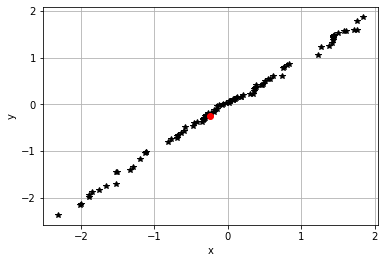

r = 6
+---+----------+----------+----------------+
| k | Центроид | клаcтера | Объём кластера |
+---+----------+----------+----------------+
| № |    x     |    y     |                |
| 1 |  -0.239  |  -0.25   |       98       |
+---+----------+----------+----------------+


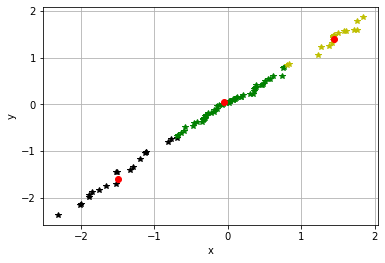

r = 3
+---+----------+----------+----------------+
| k | Центроид | клаcтера | Объём кластера |
+---+----------+----------+----------------+
| № |    x     |    y     |                |
| 1 |   -1.5   |   -1.6   |       19       |
| 2 |  -0.05   |   0.05   |       58       |
| 3 |   1.45   |   1.4    |       21       |
+---+----------+----------+----------------+


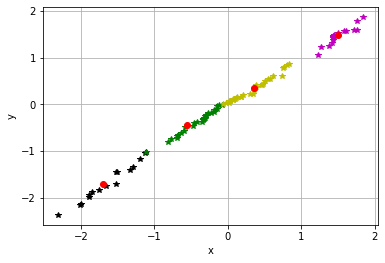

r = 2
+---+----------+----------+----------------+
| k | Центроид | клаcтера | Объём кластера |
+---+----------+----------+----------------+
| № |    x     |    y     |                |
| 1 |   -1.7   |   -1.7   |       15       |
| 2 |  -0.55   |  -0.45   |       29       |
| 3 |   0.35   |   0.35   |       35       |
| 4 |   1.5    |   1.48   |       19       |
+---+----------+----------+----------------+


In [25]:
r = 6
dist = [0] * 98
dist2 = [0] * 98
point = random.randint(0, 97)
score3 = 0
rezx = [-5] * 98
rezy = [-5] * 98
rezx2 = [-5] * 98
rezy2 = [-5] * 98
u = 0
centx = [0] * 7
centy = [0] * 7
centx2 = [0] * 7
centy2 = [0] * 7
t = 0
nx = [1] * 98
ny = [1] * 98
while score3 < 1:
    xmax = -3
    xmin = 3
    ymax = -3
    ymin = 3
    for i in range(n):
        if nx[i] != 0 and ny[i] != 0:
            dist[i] = math.sqrt((samplex[i]-samplex[point])**2+(sampley[i]-sampley[point])**2)
            if dist[i] < r:
                rezx[i] = samplex[i]
                rezy[i] = sampley[i]
            if nx[i] != 0 and ny[i] != 0:
                if rezx[i] < xmin:
                    xmin = rezx[i]
                if rezx[i] > xmax:
                    xmax = rezx[i]
                if rezy[i] < ymin:
                    ymin = rezy[i]
                if rezy[i] > ymax:
                    ymax = rezy[i]
    newx = (xmin + xmax)/2
    newy = (ymin + ymax)/2 
    centx[t] = round(newx, 3)
    centy[t] = round(newy, 3)
    xmax = -3
    xmin = 3
    ymax = -3
    ymin = 3
    for i in range(n):
        dist2[i] = math.sqrt((samplex[i]-centx[t])**2+(sampley[i]-centy[t])**2)
        if dist2[i] < r:
            rezx2[i] = samplex[i]
            rezy2[i] = sampley[i]
        if nx[i] != 0 and rezy2[i] != 0:
            if rezx2[i] < xmin:
                xmin = rezx2[i]
            if rezx2[i] > xmax:
                xmax = rezx2[i]
            if rezy2[i] < ymin:
                ymin = rezy2[i]
            if rezy2[i] > ymax:
                ymax = rezy2[i]
    newx = (xmin + xmax)/2
    newy = (ymin + ymax)/2 
    centx2[t] = round(newx, 3)
    centy2[t] = round(newy, 3)
    if centx[t] == centx2[t] and centy[t] == centy2[t]:
        for i in range(n):
            if samplex[i] == rezx2[i] and sampley[i] == rezy2[i]:
                nx[i] = 0
                ny[i] = 0
    for i in range(n):
        if nx[i] == 0 and ny[i] == 0:
            u += 1
    if u == n:
        score3 = 1
for i in range(n):
    plt.plot(rezx2[i],rezy2[i],'k*')
plt.plot(centx2[t],centy2[t],'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()
print("r = 6")
table3 = PrettyTable(["k","Центроид", "клаcтера", "Объём кластера"])
table3.add_row(["№", "x", "y", " "])
table3.add_row(["1", centx[t], centy[t], n])
print(table3)
for i in range(n):
    if i < 20:
        plt.plot(samplex[i],sampley[i],'k*')
    if i >= 20 and i < 75:
        plt.plot(samplex[i],sampley[i],'g*')
    if i >= 75 and i < 99:
        plt.plot(samplex[i],sampley[i],'y*')   
centrx1 = -1.5
centry1 = -1.6
centrx2 = -0.05
centry2 = 0.05
centrx3 = 1.45
centry3 = 1.4
plt.plot(centrx1,centry1,'ro')
plt.plot(centrx2,centry2,'ro')
plt.plot(centrx3,centry3,'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()
print("r = 3")
table4 = PrettyTable(["k","Центроид", "клаcтера", "Объём кластера"])
table4.add_row(["№", "x", "y", " "])
table4.add_row([1, centrx1, centry1, 19])
table4.add_row([2, centrx2, centry2, 58])
table4.add_row([3, centrx3, centry3, 21])
print(table4)
for i in range(n):
    if i < 16:
        plt.plot(samplex[i],sampley[i],'k*')
    if i >= 16 and i < 45:
        plt.plot(samplex[i],sampley[i],'g*')
    if i >= 45 and i < 80:
        plt.plot(samplex[i],sampley[i],'y*')  
    if i >= 80 and i < 99:
        plt.plot(samplex[i],sampley[i],'m*')
centrx1 = -1.7
centry1 = -1.7
centrx2 = -0.55
centry2 = -0.45
centrx3 = 0.35
centry3 = 0.35
centrx4 = 1.5
centry4 = 1.48
plt.plot(centrx1,centry1,'ro')
plt.plot(centrx2,centry2,'ro')
plt.plot(centrx3,centry3,'ro')
plt.plot(centrx4,centry4,'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()
print("r = 2")
table5 = PrettyTable(["k","Центроид", "клаcтера", "Объём кластера"])
table5.add_row(["№", "x", "y", " "])
table5.add_row([1, centrx1, centry1, 15])
table5.add_row([2, centrx2, centry2, 29])
table5.add_row([3, centrx3, centry3, 35])
table5.add_row([4, centrx4, centry4, 19])
print(table5)